In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")

In [4]:
df.head()

,date,day,doc,farm rate,open,close
0,1-Jan-22,Saturday,32,170,175,170
1,2-Jan-22,Sunday,–,170,180,175
2,3-Jan-22,Monday,35,175,180,167.5
3,4-Jan-22,Tuesday,37,170,180,175
4,5-Jan-22,Wednesday,38,170,180,180


In [5]:
df_maize = pd.read_csv("/content/drive/MyDrive/maize_prices.csv").iloc[2:]

In [6]:
df_maize.head()

,CropName_1,CityName,textbox5,textbox6,textbox7
2,NaN,01 Jan 15,2375,NaN,NaN
3,NaN,02 Jan 15,2375,NaN,NaN
4,NaN,03 Jan 15,2375,NaN,NaN
5,NaN,05 Jan 15,2375,NaN,NaN
6,NaN,06 Jan 15,2375,NaN,NaN


In [7]:
df_maize.rename(columns={"CityName":"date","textbox5":"price"} ,inplace=True)
df_maize = df_maize[["date","price"]]

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df_maize['date'] = pd.to_datetime(df_maize['date'], errors='coerce')
df = df.merge(df_maize , on="date")

In [9]:
df

,date,day,doc,farm rate,open,close,price
0,2022-01-01,Saturday,32,170,175,170,4750
1,2022-01-03,Monday,35,175,180,167.5,4750
2,2022-01-04,Tuesday,37,170,180,175,4750
3,2022-01-05,Wednesday,38,170,180,180,4750
4,2022-01-06,Thursday,40,175,190,190,4750
...,...,...,...,...,...,...,...
2274,2015-12-26,Saturday,15.5,117.5,135,130,2750
2275,2015-12-28,Monday,15.5,115,125,120,2750
2276,2015-12-29,Tuesday,15.5,120,130,130,2750
2277,2015-12-30,Wednesday,20.5,120,140,140,2750


In [10]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['day'] = pd.DatetimeIndex(df['date']).day
df["day_of_week"] = df.date.dt.dayofweek
df["week"] = df.date.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [11]:
def func(x):
    try:
        return float(x)
    except:
      if isinstance(x, datetime.datetime):
          return x
      return 

df = df.applymap(func)


In [12]:
# df = df.dropna()

In [13]:
len(df)

2279

In [14]:
df.head()

,date,day,doc,farm rate,open,close,price,month,year,day_of_week,week
0,2022-01-01,1.0,32.0,170.0,175.0,170.0,4750.0,1.0,2022.0,5.0,52.0
1,2022-01-03,3.0,35.0,175.0,180.0,167.5,4750.0,1.0,2022.0,0.0,1.0
2,2022-01-04,4.0,37.0,170.0,180.0,175.0,4750.0,1.0,2022.0,1.0,1.0
3,2022-01-05,5.0,38.0,170.0,180.0,180.0,4750.0,1.0,2022.0,2.0,1.0
4,2022-01-06,6.0,40.0,175.0,190.0,190.0,4750.0,1.0,2022.0,3.0,1.0


In [15]:
df_train = df[df.date < "2022"]
df_valid = df[df.date >= "2022"]

# df_train = df[:len(df)-100]
# df_valid = df[len(df)-100:]


In [16]:
df_valid.head()

,date,day,doc,farm rate,open,close,price,month,year,day_of_week,week
0,2022-01-01,1.0,32.0,170.0,175.0,170.0,4750.0,1.0,2022.0,5.0,52.0
1,2022-01-03,3.0,35.0,175.0,180.0,167.5,4750.0,1.0,2022.0,0.0,1.0
2,2022-01-04,4.0,37.0,170.0,180.0,175.0,4750.0,1.0,2022.0,1.0,1.0
3,2022-01-05,5.0,38.0,170.0,180.0,180.0,4750.0,1.0,2022.0,2.0,1.0
4,2022-01-06,6.0,40.0,175.0,190.0,190.0,4750.0,1.0,2022.0,3.0,1.0


In [17]:
def calc_lag_features(df, feature, window):
  
    df[f"{feature}_mean_{window}"] = df[feature].rolling(window=window).mean().shift().bfill()
    return df

In [18]:
df_train.sort_values(by=["date"],inplace=True)
df_train = calc_lag_features(df_train,"doc",3)
df_train = calc_lag_features(df_train,"open",3)
df_train = calc_lag_features(df_train,"close",3)
df_train = calc_lag_features(df_train,"price",3)

df_train.fillna(method="bfill",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [19]:
df_valid.sort_values(by=["date"],inplace=True)
df_valid = calc_lag_features(df_valid,"doc",3)
df_valid = calc_lag_features(df_valid,"open",3)
df_valid = calc_lag_features(df_valid,"close",3)
df_valid = calc_lag_features(df_valid,"price",3)

df_valid.fillna(method="bfill",inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
df_train.dropna(inplace=True)
df_valid.dropna(inplace=True)

In [21]:
from prophet import Prophet
model = Prophet()

In [22]:
exogenous_features = ["week","day_of_week","doc_mean_3",	"open_mean_3",	"close_mean_3",	"price_mean_3"]
for feature in exogenous_features:
	model.add_regressor(feature)

In [23]:
model.fit(df_train[["date", "farm rate"] + exogenous_features].rename(columns={"date": "ds", "farm rate": "y"}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7b3lry1/wrj7faf7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7b3lry1/5uvab7c_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68762', 'data', 'file=/tmp/tmpz7b3lry1/wrj7faf7.json', 'init=/tmp/tmpz7b3lry1/5uvab7c_.json', 'output', 'file=/tmp/tmpl_w1jmg8/prophet_model-20220824081953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
forecast = model.predict(df_valid[["date", "farm rate"] + exogenous_features].rename(columns={"date": "ds"}))

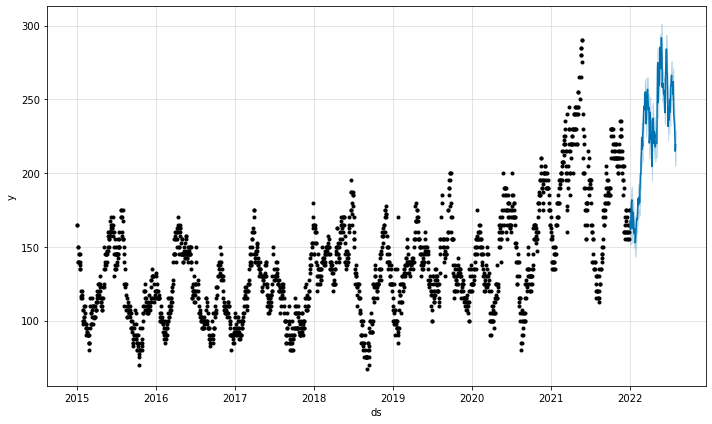

In [25]:
model.plot(forecast);

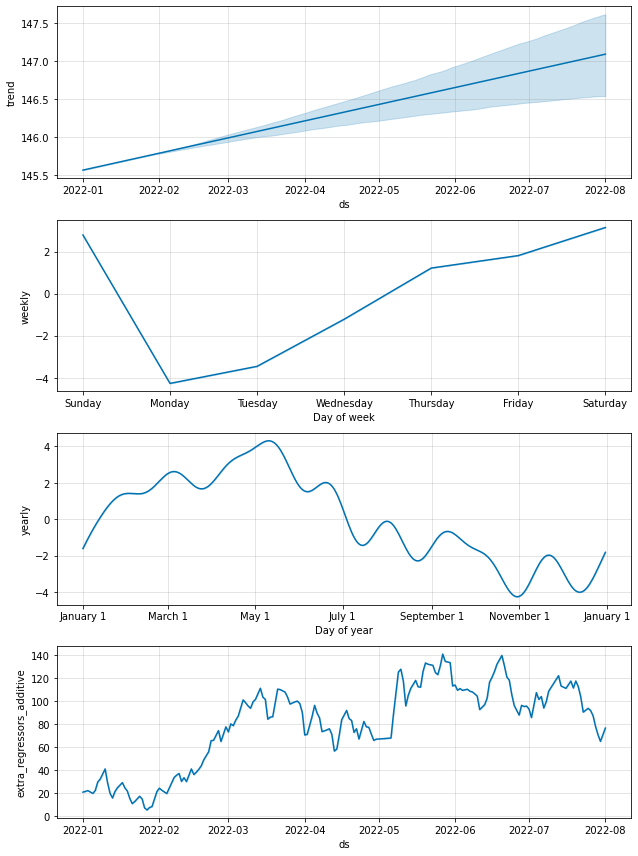

In [26]:
model.plot_components(forecast);

In [27]:
df_valid["pred"] = forecast["yhat"].to_list()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


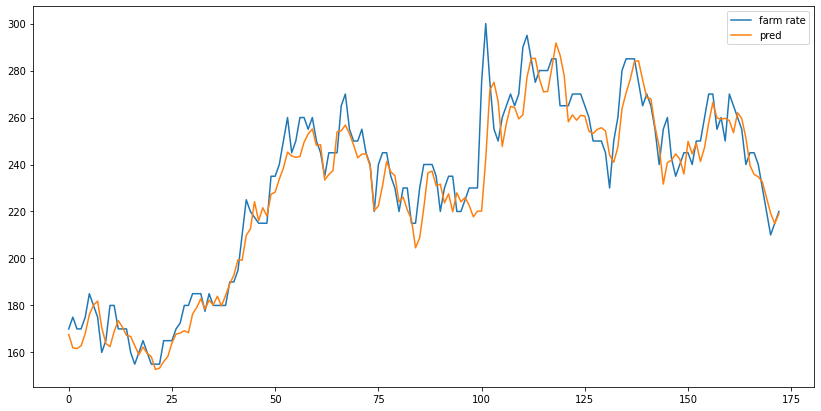

In [28]:
df_valid[["farm rate", "pred"]].plot(figsize=(14, 7))
